In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

The potential in $\verb|source/background.c|$ has been modified to have the following form:

$$V(\phi)= \lambda \sqrt{6\alpha}\left(\tanh\frac{\phi}{\sqrt{6\alpha}}+1\right) + \Lambda$$

The model has two free parameters ($\lambda,\alpha$). $\Lambda$ is chosen to satisfy the budget equation.

We assume that the initial conditions are $\phi = \dot{\phi} =0$

In [2]:
def get_cosmo(As=2.2065e-9,ns=0.9645,h=0.6727,omc=0.1198,omb=0.02225,tau=0.079,
              lam=1e-8,alp=1):
    '''
    Get a CLASS object for an alpha-attractor cosmology, specified with lam and alp.
    '''
    params = {
              'output': 'tCl lCl mPk pCl',
              'l_max_scalars': 5000,
              'lensing': 'yes',
              'P_k_max_h/Mpc': 10.,
              'non linear':'halofit', 
              'z_pk': '0.0,1087',
              'A_s': As,
              'n_s': ns,
              'h': h,
              'N_ur': 1.0196,
              'N_ncdm': 2,
              'm_ncdm': '0.01,0.05',
              'tau_reio': tau,
              'omega_b': omb,
              'omega_cdm': omc,
               # paramaters for alpha-attractor
              'Omega_Lambda': 0.0, 
              'Omega_fld':0.,
              'Omega_scf':-1,
              'scf_parameters':str(lam)+','+str(alp)+',1,0,0,0',
              'attractor_ic_scf':'no',
              'scf_tuning_index':2}

    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    return cosmo

In [3]:
cosmo = get_cosmo(lam=1e-6,alp=1/6)
bkgrnd = cosmo.get_background()

In [4]:
cosmo_lcdm = get_cosmo(lam=0.,alp=1/6)
bkgrnd_lcdm = cosmo_lcdm.get_background()

Text(0.5, 0, '$z$')

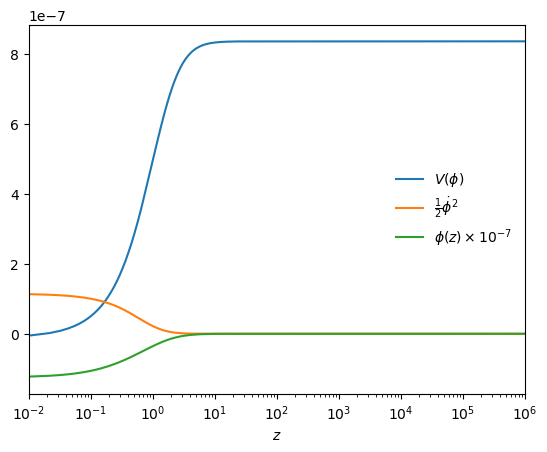

In [5]:
plt.semilogx(bkgrnd['z'],bkgrnd['V_scf'],label=r'$V(\phi)$')
plt.semilogx(bkgrnd['z'],bkgrnd["phi'_scf"]**2/2,label=r'$\frac{1}{2}\dot{\phi}^2$')
plt.semilogx(bkgrnd['z'],bkgrnd["phi_scf"]*1e-7,label=r'$\phi(z) \times 10^{-7}$')
plt.xlim(1e-2,1e6)

plt.legend(loc=0,frameon=False)
plt.xlabel(r'$z$')

Text(0, 0.5, '$H(z)$  [1/Mpc]')

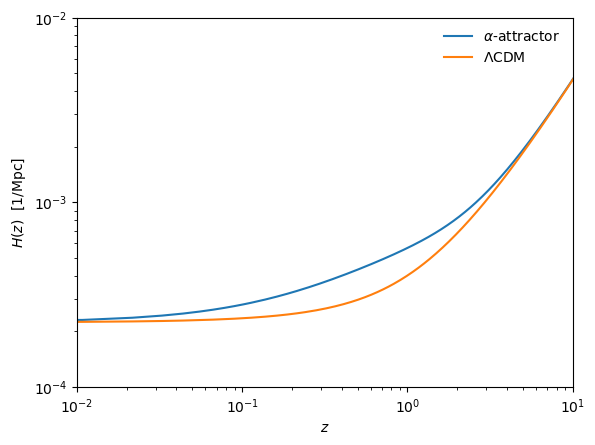

In [6]:
plt.loglog(bkgrnd['z'],bkgrnd['H [1/Mpc]'],label=r'$\alpha$-attractor')
plt.loglog(bkgrnd_lcdm['z'],bkgrnd_lcdm['H [1/Mpc]'],label=r'$\Lambda$CDM')
plt.xlim(1e-2,1e1)
plt.ylim(1e-4,1e-2)

plt.legend(loc=0,frameon=False)
plt.xlabel(r'$z$')
plt.ylabel(r'$H(z)$  [1/Mpc]')